# Day 17: Pre-class Assignment: Modeling with Ordinary Differential Equations

### <p style="text-align: right;"> &#9989; Cesarine Graham</p>

<img src="https://static1.squarespace.com/static/59e802b9be42d61a159cbf16/5adfb43d6d2a737eeb53231a/5adfb45870a6ad380a74f016/1524612324412/Photo+Apr+17%2C+6+23+00+PM+%281%29.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for today's pre-class assignment
In this assignment, you will:

- Create a model for a skydiver falling using differential equations
- Setup a *system* of differential equations (i.e., more than 1).
- Solve these systems of differential equations using the update method from the previous assignment.
- Solve these systems of differential equations using `solve_ivp`

We will build off the previous assignment where we introduced using update equations to numerically integrate a (mathematical) function. Here we will expand our tool kit by numerically solving *multiple* differential equations simultaneously, and we'll solve them using a tool built into SciPy called `solve_ivp`. 

But first, let's talk about the role of differential equations in modeling.

___
## The Role of Differential Equations in Computational Modeling

We often use equations in computational modeling, and many of the systems we wish to model contain things that are **changing**:
* changing in time (E.g., Temperature or heart rate)
* changing in space (E.g., Temperature or elevation)
* changing strategies (E.g., deciding whether to invest)
* changing numbers (of people,  molecules, stars, etc.)
* changing prices
* and so on...

In mathematics, we describe change with calculus and derivatives in particular. When an equation has a derivative in it, it is called a "[differential equation](https://en.wikipedia.org/wiki/Differential_equation)" (as opposed to, say, an algebraic equation). The types of equations can be used to model many different systems, and in this assignment, we'll see how we can use them to model the free-fall of a skydiver.

&#9989;&nbsp; **Question**: What is a value or system that you deal with on a daily basis that is changing?

<font size=+3>&#9998;</font> Changing gas prices is something that changes on a daily basis.

---
## Modeling a falling skydiver without air resistance

In this assignment, we will be modeling the motion of a skydiver. There are two variables that will be changing that we need to consider:
- The *height* of the skydiver (I.e., how far above the ground they are). This value will change with time as the skydiver gets closer and closer to the ground during their fall. 
- The *speed* (or, really, the *velocity*) of the skydiver * (I.e., how fast they are falling towards the ground). The longer the skydiver falls, the faster they will be falling. 

Since we have two values that are changing, we will need two differential equations. We can express these two values using update equations:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

The main variables to know are: $h$ refers to height, and $v$ refers to velocity.

**Note 1:** $\frac{dh}{dt} = v$, meaning that velocity is defined as the derivative of height.

**Note 2:** For the first part of this problem, $\frac{dv}{dt} = g$, where $g$ is a constant equal to $-9.81$. (Everything on Earth picks up speed at [roughly the same rate, as long as we ignore air resistance.](https://www.youtube.com/watch?v=frZ9dN_ATew))

---
### The `derivs` Function

In order to solve these problems numerically, we need to specify what $\frac{dh}{dt}$ and $\frac{dv}{dt}$ are. We’re going to use a `derivs` function, just like we did in the previous assignment, except this time it will return the derivatives for *two* equations. Specifically, we want it to return:
\begin{equation}
\frac{dh}{dt} = v
\end{equation}

\begin{equation}
\frac{dv}{dt} = g
\end{equation}

Putting it into code, we get the following:


In [1]:
# Create a function to compute derivatives of velocity and height
def derivs(v,g):
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is gravity for this example
    dvdt = g
    
    return dhdt, dvdt

#### The `derivs` function is the heart of how we will solve differential equations.

(It may seem silly to define a function that takes in two values and returns the same two values, but we'll be making it more complex in a second.)

---

### Initial Values

We first will begin by assuming: 

* $h_0 = 3000$ meters
* $v_0 = 0$ meters/second
* $g = -9.81$ gravity: meters/second^2
* $t_{max} = 30$ falling duration: seconds
* $dt = 1$ timestep

### Running the Model

&#9989;&nbsp; **This code numerically solves for the motion of the skydiver and plots the result. It should be similar to the code you wrote in your previous assignment. Review each line of code an make sure you understand what it's doing and then execute the code.**

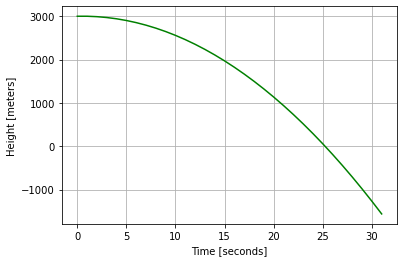

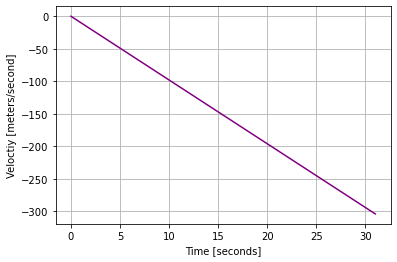

In [2]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
h = 3000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

&#9989;&nbsp; **Question:** If you want the model to stop when the skydiver hits the ground (going far too fast at the moment!), how might you build that into the model?

<font size=+3>&#9998;</font> incorporate a minimum limit and stop the loop at the limit

---
## Adding air resistance to the model

As we can see from our plots above, without air resistance the skydiver continously decreases velocity (or, "accelerates") under the force of gravity. If they start high enough, they could reach *very big* velocities!  In reality, this isn't how skydiving works, eventually the skydiver reaches a constant **"terminal velocity"**. Check out [this video](https://www.youtube.com/watch?v=ur40O6nQHsw) to learn more about air resistance and terminal velocity if you're interested.

In this case, the derivative of velocity (also known as acceleration) becomes dependent on the skydiver's velocity. It is defined to be:

$$\frac{dv}{dt} = \frac{-0.65~A~v~\left|v\right|}{m} + g$$

In this equation, $A$ is the projected area of the skydiver, $\left|v\right|$ is the absolute value of the velocity, and the $m$ is the mass of skydiver. These make up the left term, or the acceleration due to air resistance. The right term, $g$, is the acceleration from gravity, which was used in the code above.

As before, you are going to **model the free-fall of the sky-diver for a total of 30 seconds**, but now you need to take into account air resistance, using the formula above. 

You can assume that:
* The projected area (A) of the skydiver is **0.4 m$^2$**
* Their mass (m) is **80 kg**
* Their initial height is **2000 m**

Finally,

**Use a timestep (dt) of 0.1 seconds**.

&#9989;&nbsp; **Copy an paste the code from above and modify it to use the new timestep and initial height and dvdt in the `derivs` function to account for air resistance.** Think about how a skydiver might move in the air and see if your plots match those ideas. You should see that the velocity flattens out to a constant value, the terminal velocity.

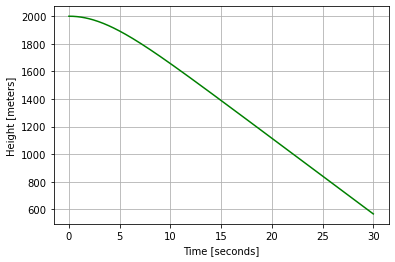

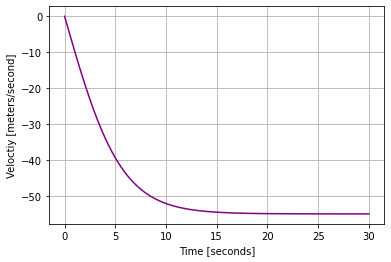

In [3]:
#Put your code here

# Create a function to compute derivatives of velocity and height
def derivs(v,g):
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is gravity for this example
    dvdt = ((-0.65*A*v*abs(v))/m) + g
    
    return dhdt, dvdt

# Initialize variables
h = 2000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 0.1 # timestep
m = 80 #mass in kilogram
A = 0.4 #projected area

# Initialize lists for storing data
height = []
velocity = []
time = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

&#9989;&nbsp; **Question**: Based on your results, what does the terminal velocity of the skydiver appear to be?

<font size=+3>&#9998;</font> The terminal velocity appears to be roughly -55m/s (negative since they are falling down).

---
## Modeling the falling skydiver using solve_ivp

As with many computational models, there is often more than one way to find a solution. In fact, Python has a software library called SciPy that includes a tool for solving sets of differential questions called `solve_ivp`.

Watch the following video to learn how we can use this tool to model the motion of the skydiver. The **[SciPy documentation highlighted in the video can be found here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).**

If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Solving+differential+equations+with+solve_ivp%28%29/1_qxx76gdo).

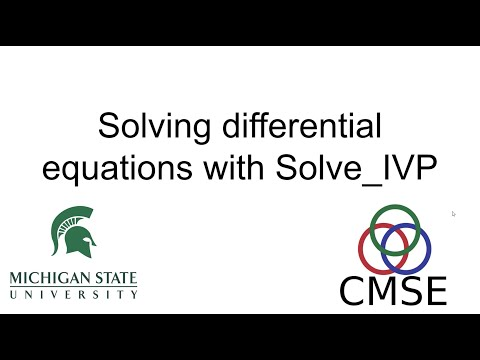

In [4]:
from IPython.display import YouTubeVideo
# You may want to watch the video in full screen to make sure you can see everything!
YouTubeVideo("QGmJrEUNXA8",width=640,height=360)

---
## Reviewing the solve_ivp solution for the skydiver problem.

The code below is the same code used in the video to model the skydiver using the SciPy `solve_ivp` tool.

&#9989;&nbsp; **Review the code and make sure you understand each line then execute the code.**

In [14]:
# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to computer the derivative
    dhdt = v
    dvdt = g
    
    return dhdt, dvdt

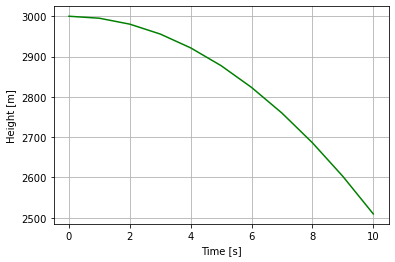

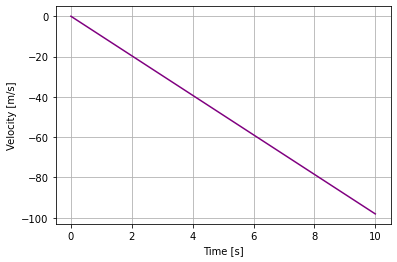

In [15]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

# Declare Variables for initial conditions
h0 = 3000 # meters
v0 = 0 # m/s
tmax = 10 # seconds
dt = 1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs,(0,tmax),init,t_eval = time)
    
# Plot the results using the values stored in the solution variable, "sol"
height = sol.y[0,:]
velocity = sol.y[:,0]

# Plot the soln_invp

# Plot the height using the "0" element from the solution
plt.figure(2)
plt.plot(time, sol.y[0,:],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the \"1\" element from the solution
plt.figure(3)
plt.plot(time, sol.y[1,:],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#9989;&nbsp; **In your own words, describe what the variable `curr_vals` holds? You may need use the `solve_ivp` documentation mentioned above.**

<font size=+3>&#9998;</font> The curr_vals holds the values of h and v which are used in the derivative calculations.

&#9989;&nbsp; **Try changing the order of the arguments in the function (I.e., `curr_vals` and `time`). Does it still work?**

<font size=+3>&#9998;</font> It does not work

---
## Adding air resistance to the solve_ivp solution

&#9989;&nbsp; Now you're going to try and **modify the provided code that uses `solve_ivp`** to include air resistance **using the same parameters you used when you added air resistance previously**. Make sure that the solution is computed for **30 seconds** of skydiver freefall time and check if you get plots that look similar to your previous solution.

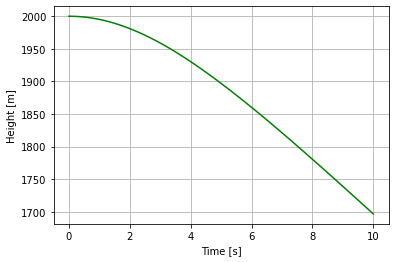

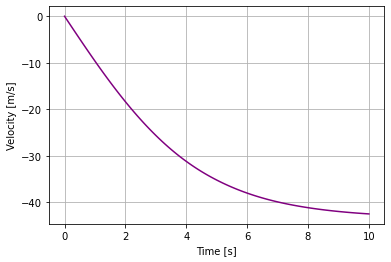

In [1]:
#Put your code here

# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    A = 0.4 # m^2 ### MODIFY ME PLEASE!
    m = 50  # kg ### MODIFY ME PLEASE!
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + ((-0.65*A*v*abs(v))/m) # MODIFY ME PLEASE! HINT: Look at your dvdt with air resistance from the update equations solution
    
    return dhdt, dvdt

# Declare Variables for initial conditions
h0 = 2000 # meters ### MODIFY ME PLEASE!
v0 = 0 # m/s
g = -9.81 # m/s^2
tmax = 10 # seconds ### MODIFY ME PLEASE!
dt = 0.1 # seconds ### MODIFY ME PLEASE!

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs, (0,tmax),init,t_eval = time)

# Unpack the results stored in the solution variable, "sol"
h = sol.y[0,:]
v = sol.y[1,:]
t = sol.t

# Plot the results we unpacked from "sol"

plt.figure(1)
plt.plot(t,h,color = 'green')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

plt.figure(2)
plt.plot(t,v, color = 'purple')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#9989;&nbsp; **Question**: Do your plots of the height and velocity of the skydiver from `solve_ivp` agree with your solution when you used the update equations?

<font size=+3>&#9998;</font> The height plots agree, but the velocity plots do not agree.


---
### Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [8]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees